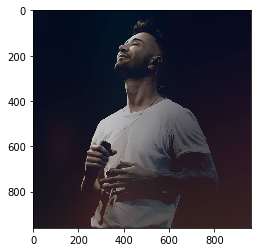

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

img= plt.imread('C:\\Users\\BorA\\Downloads\\Resimler\\taco.jpg')

plt.imshow(img)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


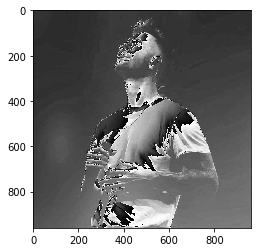

In [4]:
img.shape
m,n,p = img.shape
img2=np.zeros((m,n),dtype=float)

for i in range(m):
    for j in range(n):
        s = (img[i,j,0] + img[i,j,1] + img[i,j,2])/3
        img2 [i,j] = s

plt.imshow(img2,cmap='gray') 
plt.show()       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


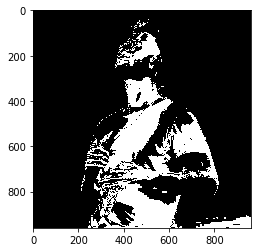

In [8]:
img3=np.zeros((m,n),dtype=float)

for i in range(m):
    for j in range(n):
        threshold=40
        s = (img[i,j,0] + img[i,j,1] + img[i,j,2])/3
        if s>threshold:
            img3 [i,j]=1
        else:
            img3 [i,j]=0

plt.imshow(img3,cmap='gray') 
plt.show()


In [9]:
import cv2 
import numpy as np

#Log Transformations
# s=clog(1+r) r=input intensity r>=0 s=output intensity c=255/(log(1+m)) c=scaling constast m=maximum pixel value

img4 = cv2.imread('C:\\Users\\BorA\\Downloads\\Resimler\\taco.jpg') 

c = 255/(np.log(1 + np.max(img4))) 
log_transformed = c * np.log(1 + img4) 

log_transformed = np.array(log_transformed, dtype = np.uint8) 
cv2.imwrite('log_transformed.jpg', log_transformed)

True

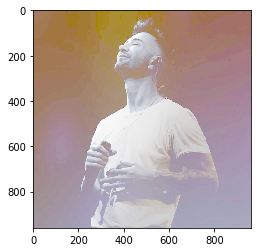

In [11]:
plt.imshow(log_transformed) 
plt.show()

In [31]:
#Power-Law (Gamma) Transformation

for gamma in [0.1, 0.5, 1.2, 2.2]: 
     gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
     cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)  


SyntaxError: invalid syntax (<ipython-input-31-a4f98be9b951>, line 5)

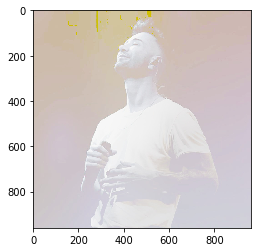

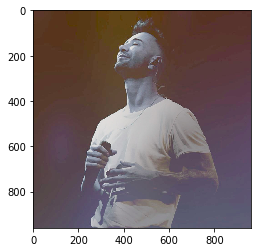

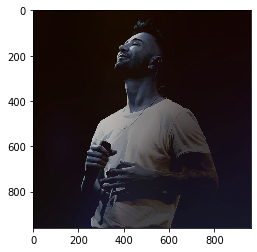

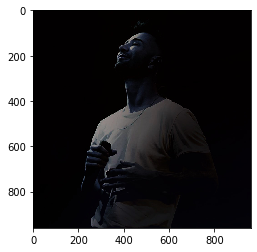

In [32]:
img5= plt.imread('C:\\Users\\BorA\\Downloads\\Resimler\\gamma_transformed0.1.jpg')
plt.imshow(img5) 
plt.show()

img6= plt.imread('C:\\Users\\BorA\\Downloads\\Resimler\\gamma_transformed0.5.jpg')
plt.imshow(img6) 
plt.show()

img7= plt.imread('C:\\Users\\BorA\\Downloads\\Resimler\\gamma_transformed1.2.jpg')
plt.imshow(img7) 
plt.show()

img8= plt.imread('C:\\Users\\BorA\\Downloads\\Resimler\\gamma_transformed2.2.jpg')
plt.imshow(img8) 
plt.show()

In [33]:
#Piecewise-Linear Transformation Functions

#Contrast =  (I_max - I_min)/(I_max + I_min)


def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
    
r1 = 70
s1 = 0
r2 = 140
s2 = 255

pixelVal_vec = np.vectorize(pixelVal)

contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 

cv2.imwrite('contrast_stretch.jpg', contrast_stretched) 

True

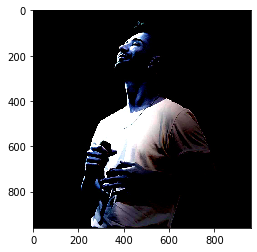

In [35]:
img9= plt.imread('C:\\Users\\BorA\\Downloads\\Resimler\\contrast_stretch.jpg')
plt.imshow(img9) 
plt.show()